# $K$-Fold CV 



In [1]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Let's bring back the data set from last time!

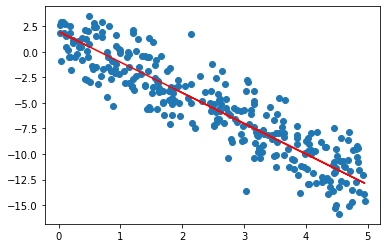

In [3]:
# Set the seed so everyone has the same numbers
np.random.seed(42)

def f(t, m = -3, b = 2):
    return m*t+b

n = 300
X_toy = np.random.uniform(0,5,n)
y_toy = f(X_toy) + np.random.normal(0,2,n)

X_toy = X_toy.reshape(-1,1)
y_toy = y_toy.reshape(-1,1)

plt.scatter(X_toy,y_toy)
plt.plot(X_toy,f(X_toy),c = 'red')

# 1. Roll your own $k$-fold

Ok, let's try to get a handle on what this $k$-fold CV is doing with our data. To do that, we're going to build our own $k$-fold splitter before we use the provided tools in `scikitlearn`. Of course, this is not going to be optimized at all, the goal is just to figure out how the innards are working. 

Before we get too far, let's remember some python commands that I always forget until I have to use them. 

In [ ]:
# This is the floor, which gives the whole part of the division, in this case 33/6.
print(33 // 5) 

# The leftover part is the remainder after the division
print(33 % 5) # Remainder

# The way I always think about this is if you are interested in n/k, then 
# k*floor + remainder = n

&#9989; **<font color=red>Do this:</font>** For our first example, let's say you have 12 data points and you want $k=4$ folds. How many data points will be in each fold?


*your answer here*

&#9989; **<font color=red>Do this:</font>** Below is the skeleton of code that will return the $k$-fold train/test splits. Update the code where noted to make it work. 

How do you check that your code is doing what you want? 
- Make sure you end up with $k$ splits 
- Make sure that each of the testing splits has $n/k$ data points
- Make sure that the rest of the data points end up in the training set. 
- A good check is to see that you have all $n$ data points between the training and testing set every time.

In [2]:
def mykfold(n,k):
    # Input: integers n and k.
    #        This version is only going to allow us to work with  
    #        a $k$ that is actually divisible by $n$ 
    # Output: a list of indices of the train/test splits to be used.
    
    # This command is just going to make a warning so that if you pass in 
    # n and k not divisble, the code will kick you out.     
    assert (n % k == 0), "k doesn't divide n, this code can't handle it"
    
    # Make an array of the indices:
    all_my_indices = np.array(range(n))
    
    
    # First, shuffle your array to make sure we're working with randomized order
    # using the function np.random.shuffle.
    # ----your code here to shuffle----# 
    
    
    # Write an equation that will figure out the length of each fold below
    length_of_fold = np.nan #<----- fix this
    
    
    # Now we're going to keep a list of all your splits. Modify the code below so that 
    # you can keep track of the training and testing splits.
    AllSplits = []
    for i in range(k):
        
        test_set = [] #<------ fix this
        training_set = [] #<------ fix this, too
        AllSplits.append({'train': training_set, 'test':test_set})
    
    return AllSplits
 
n = 12
k = 4
mykfold(n,k)
    

[{'train': [], 'test': []},
 {'train': [], 'test': []},
 {'train': [], 'test': []},
 {'train': [], 'test': []}]

### Non-divisible version

Ok, so the code above divides your data points into $k$ fold so long as $k$ divides $n$ evenly, but this isn't a reasonable assumption to make in practice. 

&#9989; **<font color=red>Q:</font>** If you have $n=14$ data points and $k=4$ folds, how many data points are in each of the folds to have them be as close to even as possible? (Note the answer isn't the same for every fold).

*Your answer here*

Now we are going to fix the code above to allow for $n$ not divisible by $k$. We want to take all the leftover data points from dividing the folds evenly and just add them to the first folds. Below is one way to figure out how long each fold should be in this more general case. 

In [ ]:
n = 14
k = 4

length_of_each_fold = [n//k for i in range(k)]

print('Fold lengths before fixing:', length_of_each_fold)
print('Total data points used:', sum(length_of_each_fold))
print('Leftover data points:', n-sum(length_of_each_fold))
print('Should be the same as the remainder:', n%k)
print('\n')

print('So we put all the leftovers in the piles one at a time:')
for i in range(n % k):
    length_of_each_fold[i]+=1
    
print(length_of_each_fold)
print('And now the total number of points should be the same as n:')
print(np.sum(length_of_each_fold))

&#9989; **<font color=red>Do this:</font>** Copy your `mykfold` function down here.  Modify it so that it can accept $n$ and $k$ that aren't divisible. 

In [ ]:
# Your code here #

n = 33
k = 5
mykfold(n,k)
    

Ok, so now your code returns indicies kind of like the LOOCV code from last time. 

&#9989; **<font color=red>Do this:</font>** Set up a linear regression model for the toy data above, and use your train test split code to figure out the MSE for each, then return the average for your $CV_{(4)}$ score, where this means we want $k=4$ folds.

In [ ]:
n = X_toy.shape[0]
print(n)
k = 3

mySplits = mykfold(n,k)

MSE = []
for entry in mySplits:
    train_index = entry['train']
    test_index = entry['test']
    print("TRAIN:", train_index, "\nTEST:", test_index, '\n')

    #Your code here!
    
print(np.average(MSE))

# 2. Letting scikitlearn do the work for us. 

Ok, now that we understand the innards, we can let `scikitlearn` do this for us.

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)

# Notice that like the leave one out version, trying to print kf still doesn't 
# give us much that's useful
print(kf)

We can see the splits by putting this generator into a for loop as follows.

In [ ]:
for train_index, test_index in kf.split(X_toy):
    print("TRAIN:", train_index, "\nTEST:", test_index, '\n')
    X_train, X_test = X_toy[train_index], X_toy[test_index]
    y_train, y_test = y_toy[train_index], y_toy[test_index]

There is a BIG PROBLEM with this code.  We haven't done something!!! Something important!!!

&#9989; **<font color=red>Q:</font>** What didn't we do? This is an easy fix, checkout the [documentation for `KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), then modify the code below to fix the problem. 



In [ ]:
# Fix this code! 
kf = KFold(n_splits=3)

for train_index, test_index in kf.split(X_toy):
    print("TRAIN:", train_index, "\nTEST:", test_index, '\n')
    X_train, X_test = X_toy[train_index], X_toy[test_index]
    y_train, y_test = y_toy[train_index], y_toy[test_index]

Now that we have our train/test split generator set up, let's take a look at the result. Note that this is just going to color by the last split generated in that for loop up above. 

In [ ]:
plt.scatter(X_train,y_train, marker = '+', label = "Training")
plt.scatter(X_test,y_test, marker = '*', label = "Testing")
plt.legend()

&#9989; **<font color=red>Q:</font>** For the linear regression model obtained in Part I of today's in-class assignment. Do cross-validation with k-fold train/test split ($k=5$) and returns the average of the MSEs. 


In [ ]:
# Your code goes here


&#9989; **<font color=red>Q:</font>** What happens if you set `n_splits = n`? 

*Your answer here*

### Easy mode

As before, we can build all this work into a very compact code, which really is doing the same thing, just in a few lines. 

In [ ]:
# This command does all your work for you
# Note this is the same command you used Monday for LOOCV
from sklearn.model_selection import cross_val_score

#build linear regression model
model = LinearRegression()

# Pick your CV method
kf = KFold(n_splits=5, shuffle = True)

#use 5-fold CV to evaluate model
scores = cross_val_score(model, X_toy, y_toy, 
                         scoring='neg_mean_squared_error',
                         cv=kf)

#view mean absolute error
np.average(np.absolute(scores))



&#9989; **<font color=red>Q:</font>**
- How do you change the above code to do $k$-fold CV for a different $k$?
- You didn't get exactly the same value as you computed a few cells up. Why?